## Rotating custom tick labels

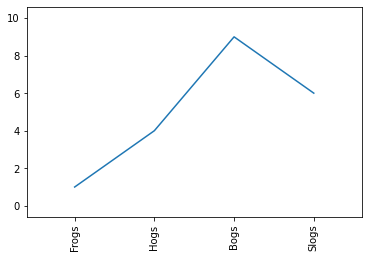

In [1]:
import matplotlib.pyplot as plt


x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

___

## Date tick labels

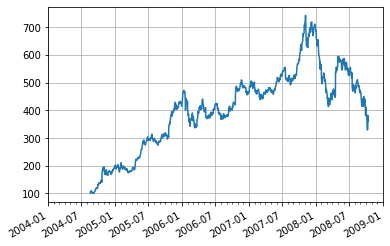

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data=data)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()

## Custom Figure subclasses

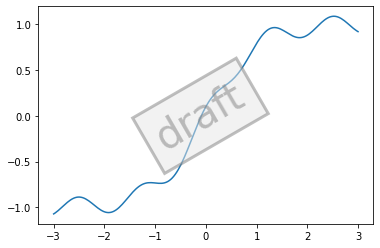

In [1]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np


class WatermarkFigure(Figure):
    """A figure with a text watermark."""

    def __init__(self, *args, watermark=None, **kwargs):
        super().__init__(*args, **kwargs)

        if watermark is not None:
            bbox = dict(boxstyle='square', lw=3, ec='gray',
                        fc=(0.9, 0.9, .9, .5), alpha=0.5)
            self.text(0.5, 0.5, watermark,
                      ha='center', va='center', rotation=30,
                      fontsize=40, color='gray', alpha=0.5, bbox=bbox)


x = np.linspace(-3, 3, 201)
y = np.tanh(x) + 0.1 * np.cos(5 * x)

plt.figure(FigureClass=WatermarkFigure, watermark='draft')
plt.plot(x, y)

## Using FixedLocator

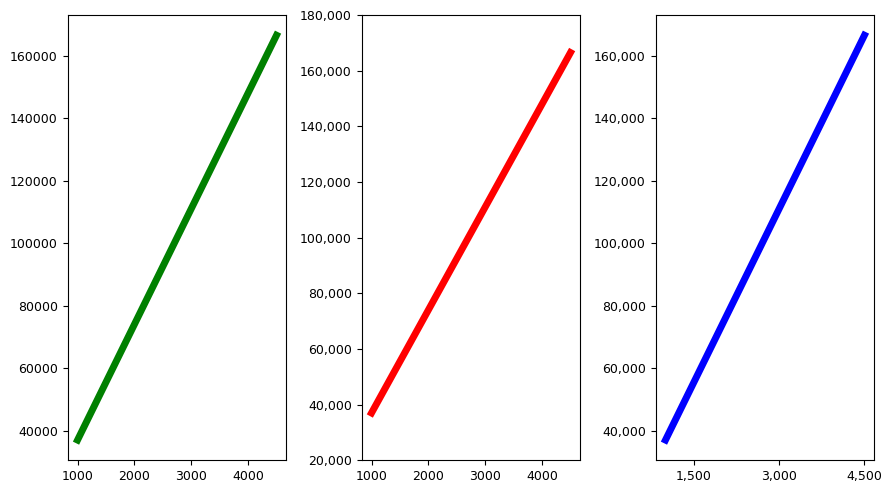

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

mpl.rcParams['font.size'] = 9

x = np.array(range(1000, 5000, 500))
y = 37*x

fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(9, 5), dpi=100)

ax1.plot(x,y, linewidth=5, color='green')
ax2.plot(x,y, linewidth=5, color='red')
ax3.plot(x,y, linewidth=5, color='blue')

label_format = '{:,.0f}'

# nothing done to ax1 as it is a "control chart."

# fixing yticks with "set_yticks"
ticks_loc = ax2.get_yticks().tolist()
ax2.set_yticks(ax1.get_yticks().tolist())
ax2.set_yticklabels([label_format.format(x) for x in ticks_loc])

# fixing yticks with matplotlib.ticker "FixedLocator"
ticks_loc = ax3.get_yticks().tolist()
ax3.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax3.set_yticklabels([label_format.format(x) for x in ticks_loc])

# fixing xticks with FixedLocator but also using MaxNLocator to avoid cramped x-labels
ax3.xaxis.set_major_locator(mticker.MaxNLocator(3))
ticks_loc = ax3.get_xticks().tolist()
ax3.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax3.set_xticklabels([label_format.format(x) for x in ticks_loc])

fig.tight_layout()
plt.show()

___

# Timeline with lines, date, and text

Timelines can be created with a collection of dates and text. in this example, we ahow how to create a simple timeline using the dates.

In [2]:
# first of all importting all the rquired modules
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import urllib.request
    import json

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=.4).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

Now, we'll create a stem plot with some variation in levels as to distinguish even close-by events. We added markers on the baseline for visual emphais on the one-dimensional nature of the time line.

for each event, we adda text label via annotate. which is offset in units of points from the tip of the event line.

Note that Matplotlib will automatically plot datetime inputs.

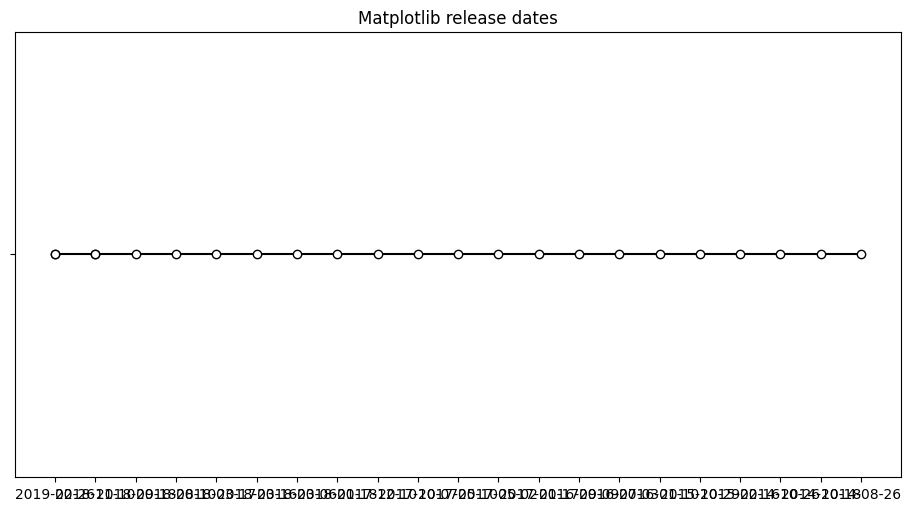

In [17]:
# Now we will make some levels for the annotations
# for that we will use the np.tile method.
levels = np.tile([-5, 5, -3, -3, -1, -1], 
                int(np.ceil(len(dates)/6)))[:len(dates)]



# NOw we will create a figure 
fig, ax = plt.subplots(figsize=(9, 5), dpi=100, constrained_layout=True)
ax.set_title("Matplotlib release dates")

# Now we will create a base line of timeline
ax.plot(dates, np.zeros_like(dates), "-o",
       color='k', markerfacecolor='w')
# Baseline and markers on it.

Until now we have created:
* first of all we have made an array of some levels which will be used set the position of the annotation text. 
* we defined a figure and axes.
* after that we have ploted a base line by using the dates with some dots.

Now we Move to furthur items.

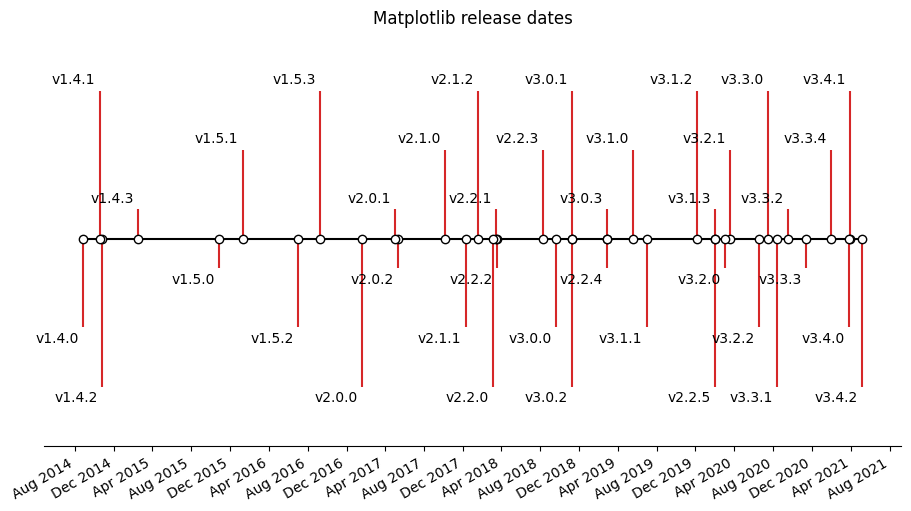

In [5]:
# Now we will make some levels for the annotations
# for that we will use the np.tile method.
levels = np.tile([-5, 5, -3, 3, -1, 1], 
                int(np.ceil(len(dates)/6)))[:len(dates)]



# NOw we will create a figure 
fig, ax = plt.subplots(figsize=(9, 5), dpi=100, constrained_layout=True)
ax.set_title("Matplotlib release dates")

# Now we will create a base line of timeline
ax.plot(dates, np.zeros_like(dates), "-o",
       color='k', markerfacecolor='w')
# Baseline and markers on it.

# Now we will create some vertical line by using the levels from the baseline
ax.vlines(dates, 0, levels, color='tab:red')

# NOw we will put the annotation text 
for d, l, r in zip(dates, levels, names):
    ax.annotate(r , xy=(d, l), 
               xytext=(-3, np.sign(l)*3), textcoords="offset points",
               horizontalalignment='right',
               verticalalignment='bottom' if l>0 else 'top')

# Now we will apply some formatting 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

# remove y axis and spines
ax.yaxis.set_visible(False)
for spin in ['left','right','top']: 
    ax.spines[spin].set_visible(False)
    
# setting some margin in y direction
ax.margins(y=0.2)
plt.show()

`Summry`:
1. first of all we have collected the data from the url or made our own data if it fails
2. after that we have created some levels to show the annotation text with a vline
3. after making the levels we have created a figure and an axes.
4. In this axes we have put a line with dates values and some dots of event.
5. we have put some vline on those dots which will help us to put annotation text.
6. we have put text annotation by using dates, levels and names which is the text of the annotation.
7. we have set major_locator by using MonthLocator and also we have used major_formatter by using DateFormatter.
8. Removed spins 

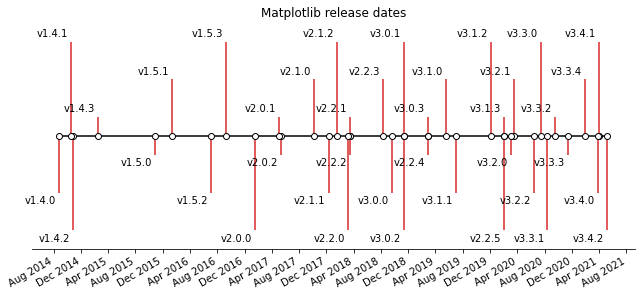

In [4]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
for spin in ['left','right','top']: 
    ax.spines[spin].set_visible(False)

ax.margins(y=0.1)
plt.show()

___

# Annotation Arrow style reference

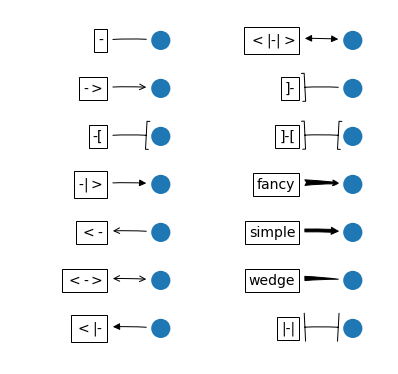

In [10]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

styles = mpatches.ArrowStyle.get_styles()

ncol = 2
nrow = (len(styles) + 1) // ncol
figheight = (nrow + 0.5)
fig = plt.figure(figsize=(4 * ncol / 1.5, figheight / 1.5))
fontsize = 0.2 * 70


ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)

ax.set_xlim(0, 4 * ncol)
ax.set_ylim(0, figheight)


def to_texstring(s):
    s = s.replace("<", r"$<$")
    s = s.replace(">", r"$>$")
    s = s.replace("}", r"$}$")
    return s


for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
    x = 3.2 + (i // nrow) * 4
    y = (figheight - 0.7 - i % nrow)  # /figheight
    p = mpatches.Circle((x, y), 0.2)
    ax.add_patch(p)

    ax.annotate(to_texstring(stylename), (x, y),
                (x - 1.2, y),
                ha="right", va="center",
                size=fontsize,
                arrowprops=dict(arrowstyle=stylename,
                                patchB=p,
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="arc3,rad=-0.05",
                                ),
                bbox=dict(boxstyle="square", fc="w"))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.show()

In [11]:
styles

{'-': matplotlib.patches.ArrowStyle.Curve,
 '<-': matplotlib.patches.ArrowStyle.CurveA,
 '->': matplotlib.patches.ArrowStyle.CurveB,
 '<->': matplotlib.patches.ArrowStyle.CurveAB,
 '<|-': matplotlib.patches.ArrowStyle.CurveFilledA,
 '-|>': matplotlib.patches.ArrowStyle.CurveFilledB,
 '<|-|>': matplotlib.patches.ArrowStyle.CurveFilledAB,
 ']-[': matplotlib.patches.ArrowStyle.BracketAB,
 ']-': matplotlib.patches.ArrowStyle.BracketA,
 '-[': matplotlib.patches.ArrowStyle.BracketB,
 '|-|': matplotlib.patches.ArrowStyle.BarAB,
 'simple': matplotlib.patches.ArrowStyle.Simple,
 'fancy': matplotlib.patches.ArrowStyle.Fancy,
 'wedge': matplotlib.patches.ArrowStyle.Wedge}

In [12]:
styles.items()

dict_items([('-', <class 'matplotlib.patches.ArrowStyle.Curve'>), ('<-', <class 'matplotlib.patches.ArrowStyle.CurveA'>), ('->', <class 'matplotlib.patches.ArrowStyle.CurveB'>), ('<->', <class 'matplotlib.patches.ArrowStyle.CurveAB'>), ('<|-', <class 'matplotlib.patches.ArrowStyle.CurveFilledA'>), ('-|>', <class 'matplotlib.patches.ArrowStyle.CurveFilledB'>), ('<|-|>', <class 'matplotlib.patches.ArrowStyle.CurveFilledAB'>), (']-[', <class 'matplotlib.patches.ArrowStyle.BracketAB'>), (']-', <class 'matplotlib.patches.ArrowStyle.BracketA'>), ('-[', <class 'matplotlib.patches.ArrowStyle.BracketB'>), ('|-|', <class 'matplotlib.patches.ArrowStyle.BarAB'>), ('simple', <class 'matplotlib.patches.ArrowStyle.Simple'>), ('fancy', <class 'matplotlib.patches.ArrowStyle.Fancy'>), ('wedge', <class 'matplotlib.patches.ArrowStyle.Wedge'>)])

### hline and vline

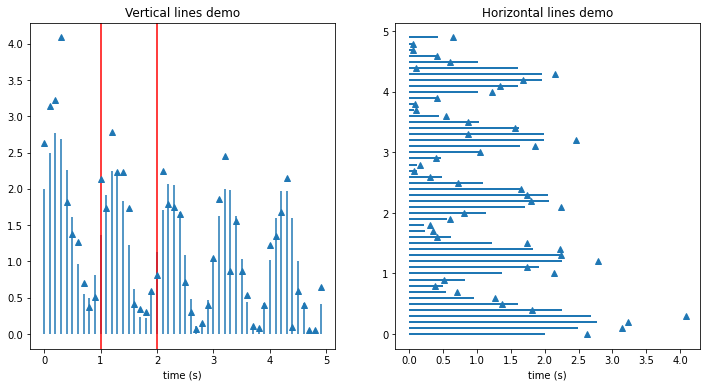

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)

t = np.arange(0.0, 5.0, 0.1)
s = np.exp(-t) + np.sin(2 * np.pi * t) + 1
nse = np.random.normal(0.0, 0.3, t.shape) * s

fig, (vax, hax) = plt.subplots(1, 2, figsize=(12, 6))

vax.plot(t, s + nse, '^')
vax.vlines(t, [0], s)
# By using ``transform=vax.get_xaxis_transform()`` the y coordinates are scaled
# such that 0 maps to the bottom of the axes and 1 to the top.
vax.vlines([1, 2], 0, 1, transform=vax.get_xaxis_transform(), colors='r')
vax.set_xlabel('time (s)')
vax.set_title('Vertical lines demo')

hax.plot(s + nse, t, '^')
hax.hlines(t, [0], s, lw=2)
hax.set_xlabel('time (s)')
hax.set_title('Horizontal lines demo')

plt.show()

In [2]:
s

array([2.        , 2.49262267, 2.76978727, 2.69187474, 2.2581053 ,
       1.60653066, 0.96102638, 0.54552879, 0.49827245, 0.81878441,
       1.36787944, 1.92065634, 2.25225073, 2.22358831, 1.83438222,
       1.22313016, 0.61411127, 0.23162701, 0.21424237, 0.56178337,
       1.13533528, 1.71024168, 2.06185967, 2.05131536, 1.67850321,
       1.082085  , 0.48648833, 0.116149  , 0.10975355, 0.46723797,
       1.04978707, 1.63283445, 1.99181872, 1.98793968, 1.62115852,
       1.03019738, 0.43953847, 0.07366701, 0.07131426, 0.43245666,
       1.01831564, 1.60435793, 1.96605209, 1.96462508, 1.60006259,
       1.011109  , 0.42226658, 0.05803876, 0.05717323, 0.41966133])

In [3]:
[0]

[0]